## Proyek Analisis Data: E-Commerce Public Dataset 

- **Nama:** RIO RIFALDI
- **Email:** riorifaldi0604@gmail.com
- **ID Dicoding:** riorifaldi0604


## Menentukan Pertanyaan Bisnis

- produk kategori apa yang memiliki harga paling tinggi dan terendah?
- tipe pembayaran apa yang paling diminati pelanggan?
- produk kategori apa yang jarang dan sering tersedia oleh pelaku usaha?
  

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math 
import csv



## Data Wrangling

### Gathering Data

In [ ]:


customers_df = pd.read_csv("./data/customers_dataset.csv")
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
orders_df = pd.read_csv("./data/orders_dataset.csv")
product_category_df = pd.read_csv("./data/product_category_name_translation.csv")
products_df = pd.read_csv("./data/products_dataset.csv")
sellers_df = pd.read_csv("./data/sellers_dataset.csv")



**Insight:**
- memasukkan data CSV dengan menggunakan library pandas
- saya menggunakan function `read_csv()` dan memasukkannya ke dalam masing masing variable

### Assessing Data

In [ ]:
# check data customers
print("duplication customers_df : ", customers_df.duplicated().sum())
print()
customers_df.info()
customers_df

In [ ]:
# check data geolocation
print("duplication geolocation_df : ", geolocation_df.duplicated().sum())
print()
geolocation_df.info()
geolocation_df


In [ ]:
# check data order_items
print("duplication order_items_df : ", order_items_df.duplicated().sum())
print()

order_items_df.info()
order_items_df


In [ ]:
# check data order_payment

print("duplication order_payments_df : ", order_payments_df.duplicated().sum())
print()
order_payments_df.info()
order_payments_df.describe()


In [ ]:
# check data order_reviews

print("duplication order_reviews_df : ", order_reviews_df.duplicated().sum())
print()
order_reviews_df.info()
order_reviews_df


In [ ]:
# check order_dataset
print("duplication order_df : ", orders_df.duplicated().sum())
print()

orders_df.info()
orders_df.isna().sum()
orders_df


In [ ]:
# product category check
print("duplication product_category_df : ", product_category_df.duplicated().sum())
print()

product_category_df.info()
product_category_df.isna().sum()
product_category_df



In [ ]:
# product dataset check

print("duplication products_df : ", products_df.duplicated().sum())
print()

products_df.info()
products_df.isna().sum()
products_df

In [ ]:
# seller dataset check

print("duplication sellers_df : ", sellers_df.duplicated().sum())
print()

sellers_df.info()
sellers_df.isna().sum()
sellers_df

Insight:
1. check dataframe `customers_df` apakah ada duplikasi atau kesalahan tipe data, ternyata tidak ada semuanya normal
2. check dataframe `geolocation_df` apakah ada duplikasi atau kesalahan tipe data, ternyata terdeteksi duplikasi data sebanyak 261831; namun tidak ada kesalahan tipe data
3. check dataframe `order_items_df` apakah ada duplikasi atau kesalahan tipe data, ternyata tidak ada duplikasi namun terdapat kesalahan tipe data pada kolom *shipping_limit_date*
4. check dataframe `order_payments_df` apakah ada duplikasi, kesalahan tipe data dan data yang bias. ternyata tidak ada semuanya normal
5. check dataframe `order_reviews_df` apakah ada duplikasi, kesalahan tipe data dan data yang bias. tidak ada duplikasi, namun terdapat beberapa data yang masih kosong dan tipe data yang tidak sesuai pada kolom *review_creation_date* dan *review_answer_timestamp*
6.  check dataframe `orders_df` apakah ada duplikasi, kesalahan tipe data dan data yang bias. tidak ada duplikasi, namun terdapat beberapa data yang masih kosong dan tipe data yang tidak sesuai pada kolom *order_purchase_timestamp*, *order_approved_at*,  *order_delivered_carrier_date*,  *order_delivered_customer_date*  dan *order_estimated_delivery_date*
7.  check dataframe `product_category_df` apakah ada duplikasi, kesalahan tipe data dan data yang bias. ternyata tidak ada semuanya normal
8.  check dataframe `products_df` apakah ada duplikasi, kesalahan tipe data dan data yang bias. ternyata tidak ada duplikasi namun terdapat beberapa data yang masih kosong
9.  check dataframe `sellers_df` apakah ada duplikasi, kesalahan tipe data dan data yang bias. ternyata tidak ada semuanya normal


### Cleaning Data

In [24]:
# cleaning data geolocatiom_df
geolocation_df.drop_duplicates(inplace=True)
print("duplication geolocation_df  after cleaning : ", geolocation_df.duplicated().sum())
geolocation_df.info()

duplication geolocation_df  after cleaning :  0
<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 0 to 1092
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  601 non-null    int64  
 1   geolocation_lat              601 non-null    float64
 2   geolocation_lng              601 non-null    float64
 3   geolocation_city             601 non-null    object 
 4   geolocation_state            601 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 28.2+ KB


In [25]:
# change datatype of shipping_limit_date to datetime
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [26]:
# replace missing value on review_comment_title with dominant value
order_reviews_df.review_comment_title.value_counts()
order_reviews_df.review_comment_title.fillna(value="Recomendo",inplace=True)

# replace missing value on review_comment_message with dominant value
order_reviews_df.review_comment_message.fillna(value="Muito bom",inplace=True)
order_reviews_df.review_comment_message.value_counts()

# change review_answer_timestamp and review_creation_date data type to date
datetime_column = ["review_answer_timestamp","review_creation_date"]

for column in datetime_column:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                2518 non-null   object        
 1   order_id                 2518 non-null   object        
 2   review_score             2518 non-null   int64         
 3   review_comment_title     2518 non-null   object        
 4   review_comment_message   2518 non-null   object        
 5   review_creation_date     2518 non-null   datetime64[ns]
 6   review_answer_timestamp  2518 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 137.8+ KB


/var/folders/05/sq0lxtks4fb88jrjv5f0rn9w0000gn/T/ipykernel_15940/2384066307.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_title.fillna(value="Recomendo",inplace=True)
/var/folders/05/sq0lxtks4fb88jrjv5f0rn9w0000gn/T/ipykernel_15940/2384066307.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [27]:
# change order_df wrong datatype
date_column = [
"order_purchase_timestamp",     
"order_approved_at",            
"order_delivered_carrier_date", 
"order_delivered_customer_date",
"order_estimated_delivery_date"
]
for column in date_column:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       2051 non-null   object        
 1   customer_id                    2051 non-null   object        
 2   order_status                   2051 non-null   object        
 3   order_purchase_timestamp       2051 non-null   datetime64[ns]
 4   order_approved_at              2047 non-null   datetime64[ns]
 5   order_delivered_carrier_date   2024 non-null   datetime64[ns]
 6   order_delivered_customer_date  1996 non-null   datetime64[ns]
 7   order_estimated_delivery_date  2051 non-null   datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 128.3+ KB


In [28]:
# set uncategories product with "others" category
new_category = {"product_category_name" : "others","product_category_name_english" : "others"}

product_category_df.loc[len(product_category_df)] = new_category;
product_category_df.reset_index(drop=True)

product_category_df.drop_duplicates(inplace=True)

product_category_df.sample(20)

,product_category_name,product_category_name_english
60,la_cuisine,la_cuisine
70,seguros_e_servicos,security_and_services
63,portateis_casa_forno_e_cafe,small_appliances_home_oven_and_coffee
48,livros_interesse_geral,books_general_interest
52,sinalizacao_e_seguranca,signaling_and_security
12,papelaria,stationery
31,market_place,market_place
71,others,others
34,artigos_de_festas,party_supplies
51,fashion_esporte,fashion_sport


In [29]:
# drop two data with almost null value at whole column
products_df.drop(products_df[products_df["product_width_cm"].isna()].index,inplace=True)

# fill other uncategories data with category "others"
products_df["product_category_name"].fillna(value="others",inplace=True)

# fill product_name_lenght with average of all data
average_product_name = math.floor(products_df.product_name_lenght.mean())
products_df["product_name_lenght"].fillna(value=average_product_name,inplace=True)

# fill  product_description_lenght with average of all data
average_product_description = math.floor(products_df.product_description_lenght.mean())
products_df["product_description_lenght"].fillna(value=average_product_description,inplace=True)


# fill product_photos_qty with average of all data
average_product_photo_qty = math.floor(products_df.product_photos_qty.mean())
products_df["product_photos_qty"].fillna(value=average_product_photo_qty,inplace=True)


products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  float64
 3   product_description_lenght  32949 non-null  float64
 4   product_photos_qty          32949 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


/var/folders/05/sq0lxtks4fb88jrjv5f0rn9w0000gn/T/ipykernel_15940/4263554454.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_category_name"].fillna(value="others",inplace=True)
/var/folders/05/sq0lxtks4fb88jrjv5f0rn9w0000gn/T/ipykernel_15940/4263554454.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

Insight:
- pertama saya melakukan pembersihan data duplikasi pada dataframe geolocation dengan menggunakan funsi `geolocation_df.drop_duplicates(inplace=True)`
- pada `order_items_df`, saya melakikan pengubahan tipe data yang tidak sesuai, yaitu tipe data object menjadi datetime menggunakan fungsi dari pandas `pd.to_datetime()`
- pada `order_reviews_df` saya akan melakukan pengisian data yang kosong dengan mempertimbangkan data yang paling dominan. selain itu saya juga melakukan konversi tipe data menjadi datetime pada kolom review_answer_timestamp dan review_creation_date
- pada `orders_df` saya juga melakukan konversi tipe data menjadi datetime, kolom tersebut diantaranta ialah order_purchase_timestamp, order_approved_at,  order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date  
- pada `product_category_df` saya menambahkan kategori baru yaitu *others*, hal ini saya lakukan karena terdapat beberapa produk yang tidak terkategori dan dianggap sebagai data yang kosong
- pada `products_df` saya melakukan pengisian data yang kosong berdasarkan rata rata dari seluruh data, selain itu saya juga mengisikan produk yang tidak terkategori menjadi *others*

## Visualization & Explanatory Analysis

### Analisis:

In [31]:
order_payments_df.groupby(by="payment_type").agg({
    "payment_value" : ["mean","min","std"]
})

sellers_product_df = order_items_df[["seller_id","product_id","price","freight_value"]].merge(products_df[["product_id","product_category_name"]],how="left").merge(sellers_df,how="left").merge(products_df[["product_weight_g","product_id","product_length_cm","product_height_cm","product_width_cm"]],how="left").merge(product_category_df,how="left")

sellers_product_df.groupby("product_category_name").seller_id.nunique().sort_values(ascending=False)

sellers_product_df.groupby("product_category_name").agg({
    "product_id" :"nunique",
    "price":["max","min","mean"]
})

sellers_product_df.groupby(["product_category_name","seller_state"]).seller_id.nunique().sort_values(ascending=False).head(10)

sellers_product_df.groupby(["product_category_name","seller_state"]).product_id.nunique().sort_values(ascending=False).head(10)

products_df.groupby(["product_category_name","product_weight_g"]).product_id.nunique().sort_values(ascending=False)

sellers_product_df["volume_in_cm"] = (sellers_product_df["product_length_cm"] * sellers_product_df["product_height_cm"] * sellers_product_df["product_width_cm"])


sellers_product_df.drop(columns=["product_category_name"],inplace=True)
sellers_product_df.rename(columns={"product_category_name_english" : "product_category_name"},inplace=True)

sellers_product_df.groupby(["product_category_name","volume_in_cm"]).product_id.nunique().sort_index(ascending=False)


def quote_text_only(value):
    if isinstance(value, str):  
        return f'"{value}"'
    else:
        return value  


df_quoted = sellers_product_df.applymap(quote_text_only)
df_quoted.to_csv('./dashboard/main_data.csv', index=False, quoting=csv.QUOTE_NONE, escapechar='\\')

sellers_product_df

/var/folders/05/sq0lxtks4fb88jrjv5f0rn9w0000gn/T/ipykernel_15940/369818384.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_quoted = sellers_product_df.applymap(quote_text_only)


,seller_id,product_id,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,volume_in_cm
0,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,27277,volta redonda,SP,650.0,28.0,9.0,14.0,cool_stuff,3528.0
1,dd7ddc04e1b6c2c614352b383efe2d36,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,3471,sao paulo,SP,30000.0,50.0,30.0,40.0,pet_shop,60000.0
2,5b51032eddd242adc84c38acab88f23d,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,37564,borda da mata,MG,3050.0,33.0,13.0,33.0,furniture_decor,14157.0
3,9d7a1d34a5052409006425275ba1c2b4,7634da152a4610f1595efa32f14722fc,12.99,12.79,14403,franca,SP,200.0,16.0,10.0,15.0,perfumery,2400.0
4,df560393f3a51e74553ab94004ba5c87,ac6c3623068f30de03045865e4e10089,199.90,18.14,87900,loanda,PR,3750.0,35.0,40.0,30.0,garden_tools,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,b8bc237ba3788b23da09c0f1f3a3288c,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,88303,itajai,SC,10150.0,89.0,15.0,40.0,housewares,53400.0
112646,f3c38ab652836d21de61fb8314b69182,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1206,sao paulo,SP,8950.0,45.0,26.0,38.0,computers_accessories,44460.0
112647,c3cfdc648177fdbbbb35635a37472c53,72a30483855e2eafc67aee5dc2560482,99.90,16.95,80610,curitiba,PR,967.0,21.0,24.0,19.0,sports_leisure,9576.0
112648,2b3e4a2a3ea8e01938cabda2a3e5cc79,9c422a519119dcad7575db5af1ba540e,55.99,8.72,4733,sao paulo,SP,100.0,20.0,20.0,20.0,computers_accessories,8000.0


### Pertanyaan 1:

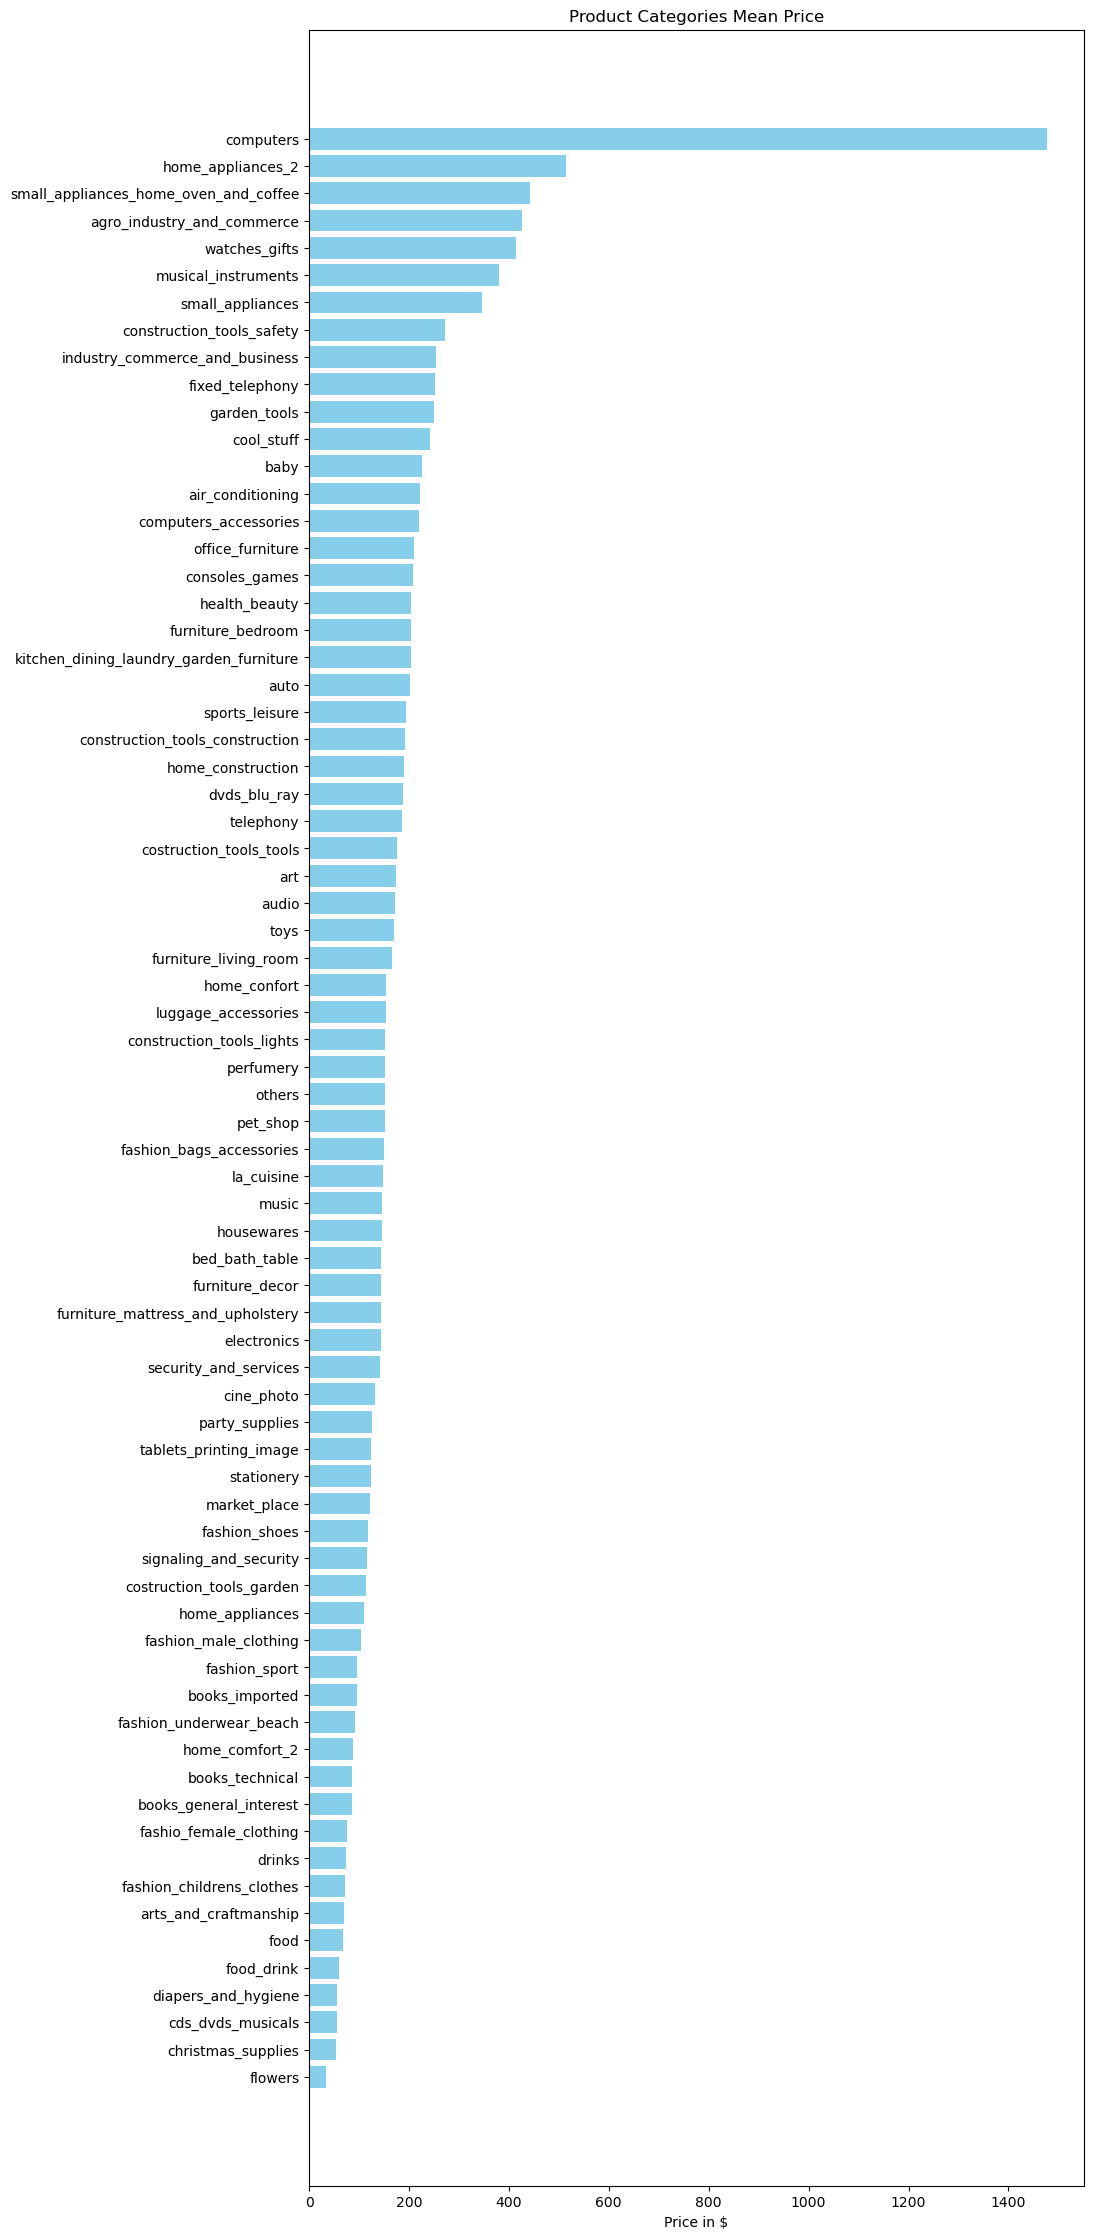

In [32]:

product_price = sellers_product_df.groupby(["product_category_name","price"]).product_id.nunique().sort_index(ascending=False).reset_index()


product_price.drop(columns="product_id",inplace=True)
product_price.columns = ["product_category_name","mean_price"]

product_mean_price = product_price.groupby("product_category_name").mean().mean_price.to_dict()


categories = list(product_mean_price.keys())
values = list(product_mean_price.values())
data = pd.DataFrame({'Category': categories, 'Value': values}).sort_values(by='Value', ascending=True)

plt.figure(figsize=(10, 28))  
plt.barh(data['Category'], data['Value'], color='skyblue')
plt.xlabel('Price in $')
plt.title('Product Categories Mean Price')
plt.show()





### Pertanyaan 2:

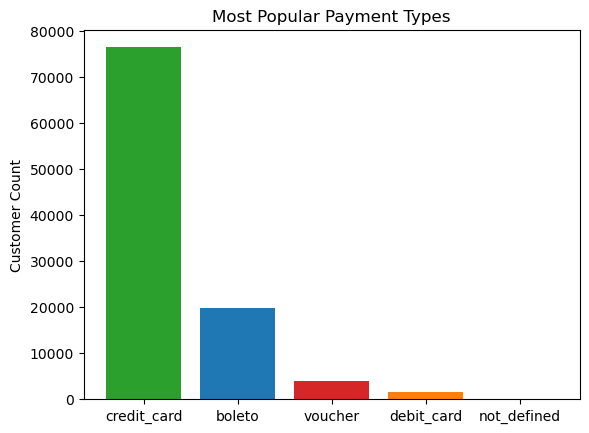

In [33]:

customer_payment_list = order_payments_df.groupby(["payment_type"]).order_id.nunique().sort_values(ascending=False)

customer_payment_list_dict = customer_payment_list.to_dict()

fig, ax = plt.subplots()

payment_method = list(customer_payment_list_dict.keys())
data_payment_method = list(customer_payment_list_dict.values())
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange','tab:blue']

ax.bar(payment_method, data_payment_method, color=bar_colors)

ax.set_ylabel('Customer Count')
ax.set_title('Most Popular Payment Types')


plt.show()



### Pertanyaan 3:

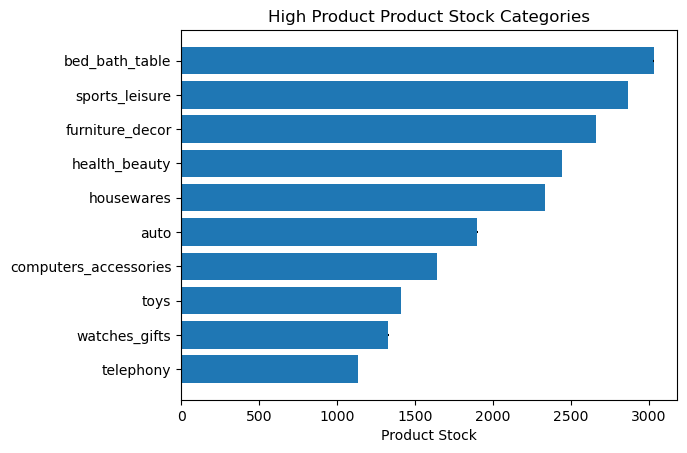

In [34]:


data_list_dict = sellers_product_df.groupby(["product_category_name"]).product_id.nunique().sort_values(ascending=False).head(10).to_dict()


fig, ax = plt.subplots()

data_product_categories = list(data_list_dict.keys())
data_product_values = list(data_list_dict.values())
y_pos = np.arange(len(data_product_categories))
error = np.random.rand(len(data_product_categories))

ax.barh(y_pos, data_product_values, xerr=error, align='center')
ax.set_yticks(y_pos, labels=data_product_categories)
ax.invert_yaxis()  
ax.set_xlabel('Product Stock')
ax.set_title('High Product Product Stock Categories')

plt.show()






## Analisis Lanjutan (Opsional)

In [ ]:
#code

## Conclusion

#### Conclution pertanyaan 1
dari data diatas dapat kita simpulkan bahwa produk kategori dengan nilai termahal adalah *computers* dan produk termurah adalah *flowes*
    
#### Conclution pertanyaan 2
hasil analisis menunjukkan customer cenderung memilih metode pembayaran dengan kartu kredit hingga 76795, ini sangatlah logis karena kemudahan pembayaran dengan hanya menggesek kartu membuat pengalaman yang bagus untuk customers

#### Conclution pertanyaan 3
hasil analisis menunjukkan bahwa produk kategori dengan stok terbanyak adalah  *bed_bath_table* dan produk dengan stok terbanyak ke 10 adalah *telephony*